# Introduction

__[Kaggle data set](https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn?select=credit_card_churn.csv)__

#### Business Problem <br>
<div>
<b>Business case</b> A business manager of a consumer credit card bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are more likely to churn.
</div>

####  Columns Description: 
1. <b>Attrition_Flag:</b>  Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
2. <b>Customer_Age:</b> Customers age 
3. <b>Gender:</b> Gender of the account holder
4. <b>Dependent_count:</b> Number of dependents
5. <b>Education_Level:</b> Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate
6. <b>Marital_Status:</b> Marital Status of the account holder
7. <b>Income_Category:</b> Annual Income Category of the account holder
8. <b>Card_Category:</b> Type of Card
9. <b>Months_on_book:</b> Period of relationship with the bank
10. <b>Total_Relationship_Count:</b> Total no. of products held by the customer
11. <b>Months_Inactive_12_mon:</b> No. of months inactive in the last 12 months
12. <b>Contacts_Count_12_mon:</b> No. of Contacts between the customer and bank in the last 12 months
13. <b>Credit_Limit:</b> Credit Limit on the Credit Card
14. <b>Total_Revolving_Bal:</b> The balance that carries over from one month to the next is the revolving balance
15. <b>Avg_Open_To_Buy:</b> Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
16. <b>Total_Trans_Amt:</b> Total Transaction Amount (Last 12 months)
17. <b>Total_Trans_Ct:</b> Total Transaction Count (Last 12 months)
18. <b>Total_Ct_Chng_Q4_Q1:</b> Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
19. <b>Total_Amt_Chng_Q4_Q1:</b> Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
20. <b>Avg_Utilization_Ratio:</b> Represents how much of the available credit the customer spent

<div>
<b>About this file:</b>
 This is a dataset aimed for data science use case project, specifically for classification model.
 Note: Please ignore the last 2 columns (Naive Bayes Classification), we suggest better delete it before doing anything.
</div>

# First Step: Data cleaning, analysis and  visualization

##### Packages and versions used for the project

In [5]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 15.2 MB/s eta 0:00:00


In [6]:
import sys
import sklearn
import xgboost
print("Python Version", sys.version)
print("Sklearn version",sklearn.__version__)

Python Version 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
Sklearn version 1.2.0
XGBoost version: 1.7.5


#### Importing the necessary libraries for data preprocessing 

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
# displays the maximun columns in the dataframe
pd.set_option('display.max_columns', 40)

# ignoring runtime warnings 
import warnings
warnings.filterwarnings('ignore')

#### Loading the data into dataframe

In [10]:
data = pd.read_csv('credit_card_churn.csv')

#### Shape of the data

In [11]:
data.shape

(10127, 23)

In [12]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

#### Dropping the first and last two columns it is not useful for the data analysis

In [13]:
df = data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [14]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Dataframe columns

1. Customer_Age,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct, Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio, are all continous varaibles, rest are categorical variables
2. Atttrition_flag is the target variable

#### Checking if null values exist in the dataframe

In [15]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### There are no missing values in the dataframe

# Data Analysis

In [16]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

#### There are  outliers in the data max is far off from the mean and median

1. Total_Trans_Amt
2. Credit_limit
3. Avg_Open_To_Buy

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

#### Numerical columns in the given dataframe

In [18]:
df_numeric= df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
'Avg_Utilization_Ratio']]

# Data Visualization

<div> Checking the outliers on each feature</div>
<div> The below function would take the dataframe and crate a box sub plots for the numerical features</div>

In [19]:
def plot_boxplot(df, color='skyblue', kde=False):
    num_columns = len(df.columns)
    num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column_name in enumerate(df.columns):
        sns.boxplot(x=df[column_name], color=color, ax=axes[i])
        axes[i].set_xlabel(column_name)
        axes[i].set_ylabel('Value')
        axes[i].set_title(f'Box plot of {column_name}')

        if kde:
            sns.kdeplot(df[column_name], color=color, ax=axes[i], linewidth=3)

    # Remove the unused subplots (if any)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

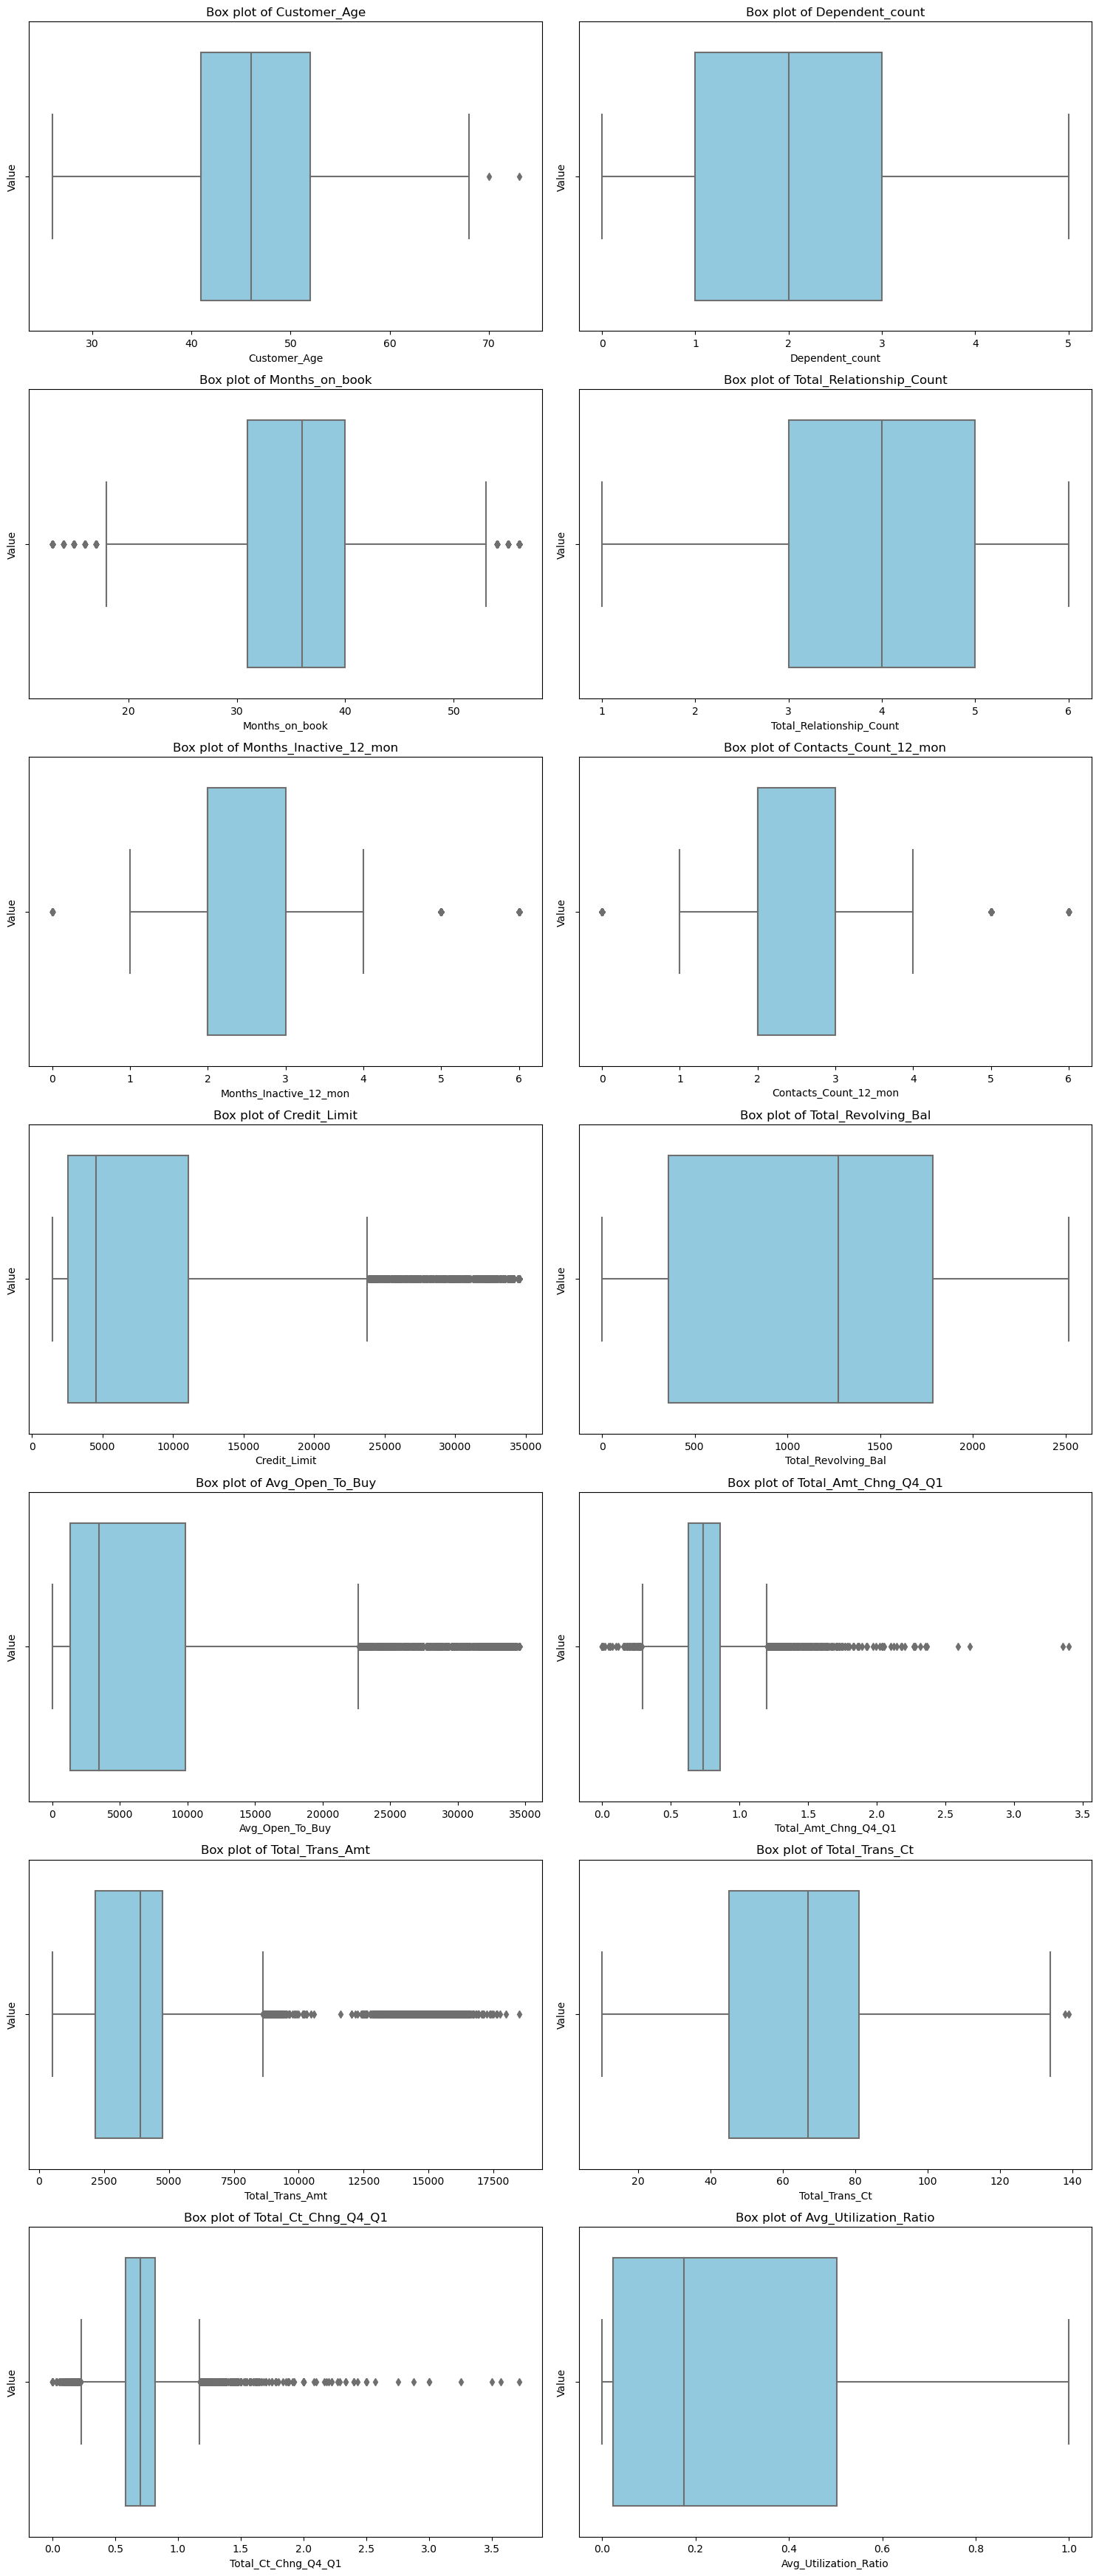

In [20]:
plot_boxplot(df_numeric)

In [21]:
def plot_histogram(df, color='skyblue', kde=False):
    num_columns = len(df.columns)
    num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column_name in enumerate(df.columns):
        sns.histplot(x=df[column_name], color=color, ax=axes[i])
        axes[i].set_xlabel(column_name)
        axes[i].set_ylabel('Value')
        axes[i].set_title(f'Box plot of {column_name}')

        if kde:
            sns.kdeplot(df[column_name], color=color, ax=axes[i], linewidth=3)

    # Remove the unused subplots (if any)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

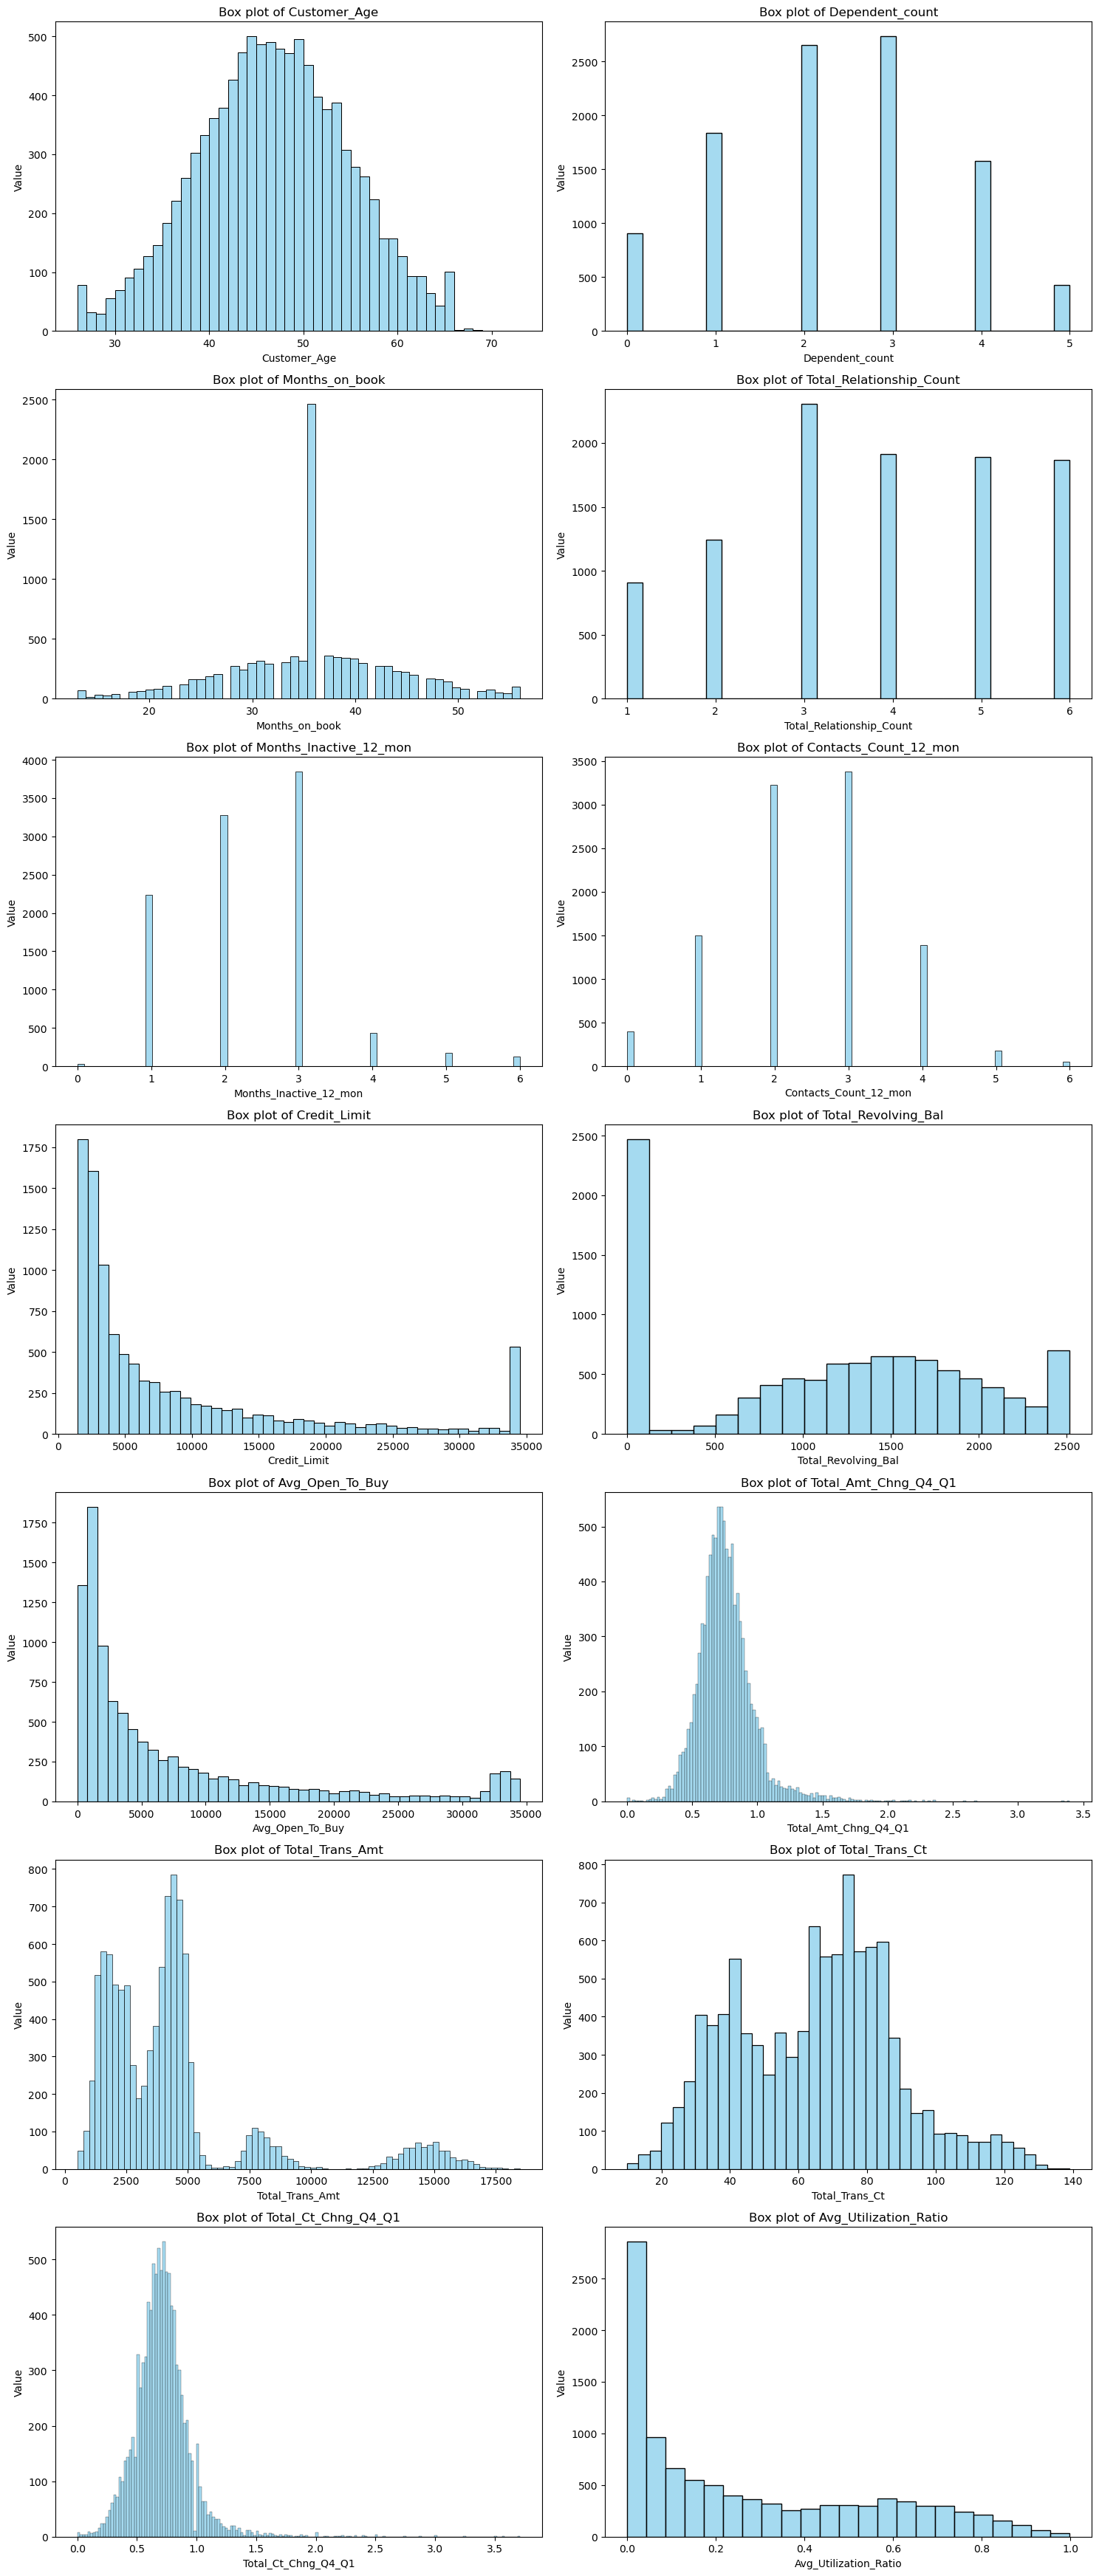

In [22]:
plot_histogram(df_numeric)

<div>
<b>Distribution: </b> Seems like Customer age, Total_amt_Chang_q4_q1,Total_revolving balance, Total_Amt_Chng_Q4_Q1
    are normally distributed and Total_Trans_amt have 4 distributions curve plots.
</div>

<div>Checking all the unique values for the categorical variables and also checking which customers have churned or not
</div>

In [23]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [24]:
df['Attrition_Flag'].value_counts() 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [25]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [26]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [27]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [28]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

<div>Checking Gender feature
</div>

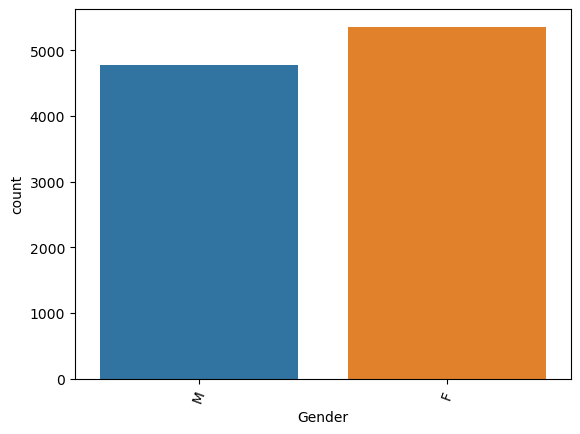

In [29]:
sns.countplot(x='Gender', data=df)
plt.xticks(rotation=70)
plt.show()

<div>Checking Attrition_flag count feature
</div>

<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

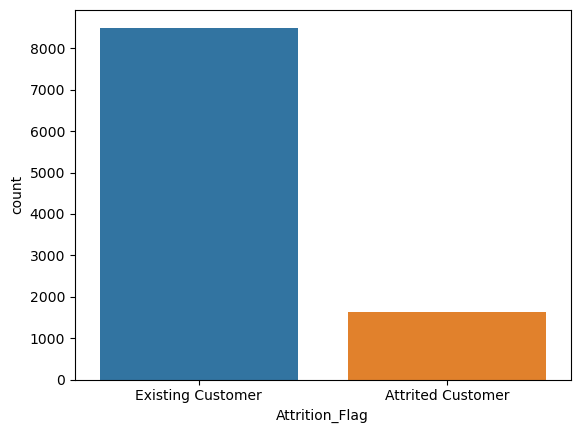

In [30]:
sns.countplot(x='Attrition_Flag', data=df)

<div>The target variable is higly imbalanced</div>

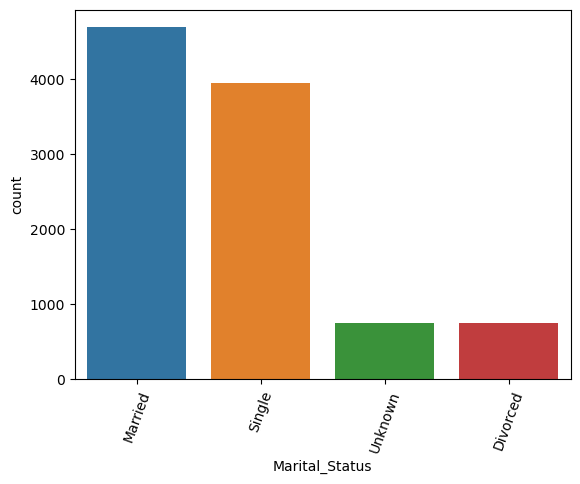

In [31]:
sns.countplot(x='Marital_Status', data=df)
plt.xticks(rotation=70)
plt.show()

<div> Most of the customers are married and half are single and very less Unknown and divorced </div>

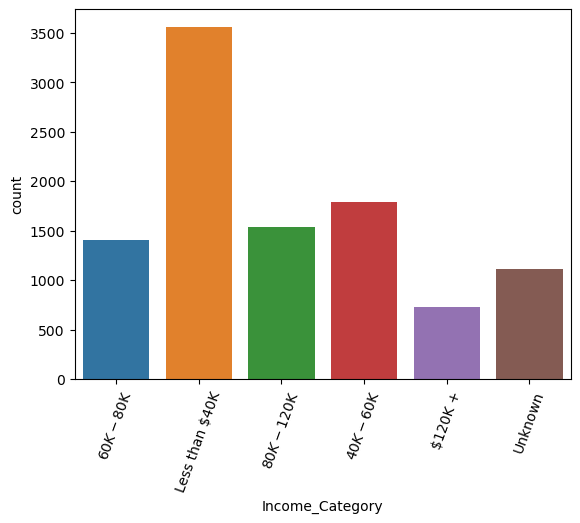

In [32]:
sns.countplot(x='Income_Category', data=df)
plt.xticks(rotation=70)
plt.show()

<div>More customers are less than 40k income and 40-60k are around 25%, less on 120K income level and more than 12% are unknown income levels </div>

<AxesSubplot: >

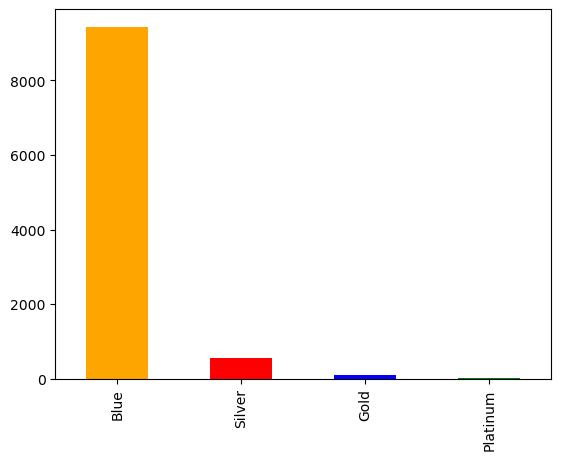

In [33]:
df['Card_Category'].value_counts().plot.bar(color=['orange','red','blue','green'])


<div> 90% percent of the customer are held Blue card</div>

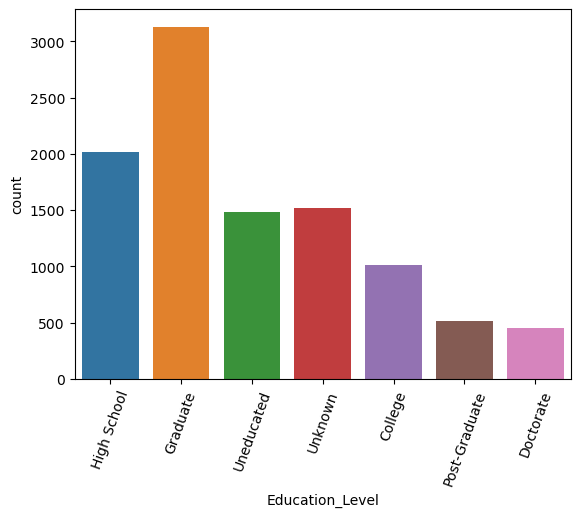

In [34]:
sns.countplot(x='Education_Level', data=df)
plt.xticks(rotation=70)
plt.show()

<div> Most of the customers are graduates and have high school education. There are 30% population have unknown education </div>

<div> Setting attrition categorical feature value Existing Customer value 1 and Attrited Customer is 0</div>

In [35]:
target={'Existing Customer': 1,'Attrited Customer':0}
df['Attrition_Flag']= df['Attrition_Flag'].map(target)

<div> Analyzing the which customers are more likely churning. Data Analysis</div>

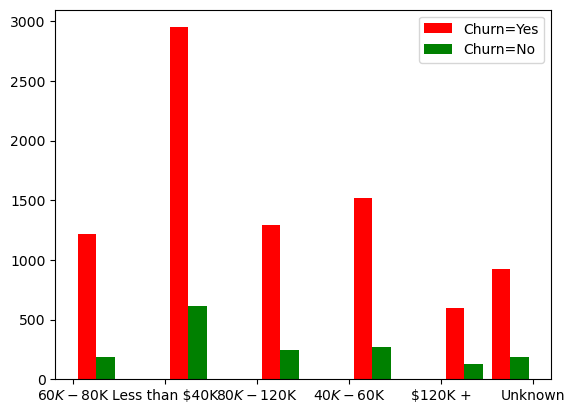

In [36]:
atttrition_more_income = df[df.Attrition_Flag==1].Income_Category
atttrition_less_income = df[df.Attrition_Flag==0].Income_Category
plt.hist([atttrition_more_income,atttrition_less_income],color=['red','green'], label=['Churn=Yes','Churn=No'])
plt.legend()

#### Less income people are have more churning rate

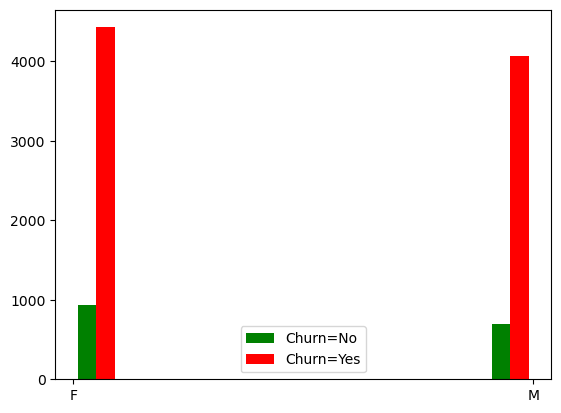

In [37]:
not_churn_Gender = df[df.Attrition_Flag==1].Gender
churn_Gender = df[df.Attrition_Flag==0].Gender
plt.hist([churn_Gender,not_churn_Gender],color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

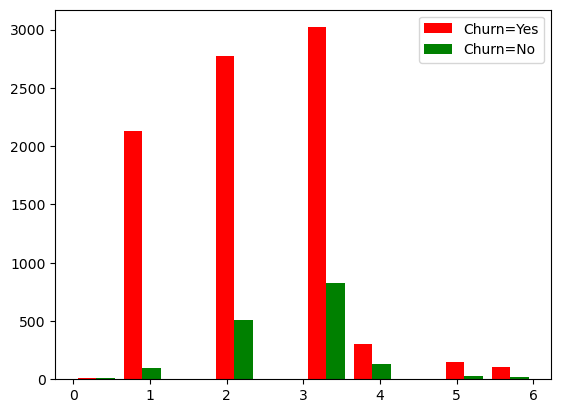

In [38]:
not_churn_total_inactive = df[df.Attrition_Flag==1].Months_Inactive_12_mon
churn_total_inactive = df[df.Attrition_Flag==0].Months_Inactive_12_mon
plt.hist([not_churn_total_inactive,churn_total_inactive],color=['red','green'], label=['Churn=Yes','Churn=No'])
plt.legend()

<div> Not active card usage customers are more likely churning</div>

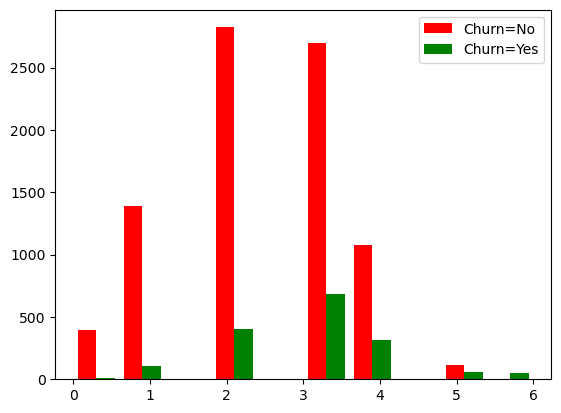

In [39]:
not_churn_contact_count = df[df.Attrition_Flag==1].Contacts_Count_12_mon
churn_contact_count = df[df.Attrition_Flag==0].Contacts_Count_12_mon
plt.hist([not_churn_contact_count,churn_contact_count],color=['red','green'], label=['Churn=No','Churn=Yes'])
plt.legend()

<div> Less communication  to the bank are more likely to churn</div>

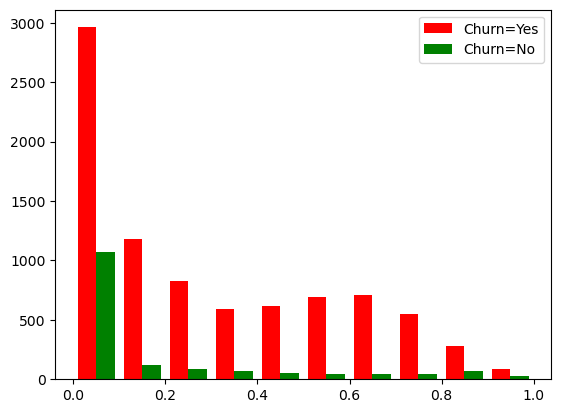

In [40]:
not_churn_contact_count = df[df.Attrition_Flag==1].Avg_Utilization_Ratio
churn_contact_count = df[df.Attrition_Flag==0].Avg_Utilization_Ratio
plt.hist([not_churn_contact_count,churn_contact_count],color=['red','green'], label=['Churn=Yes','Churn=No'])
plt.legend()

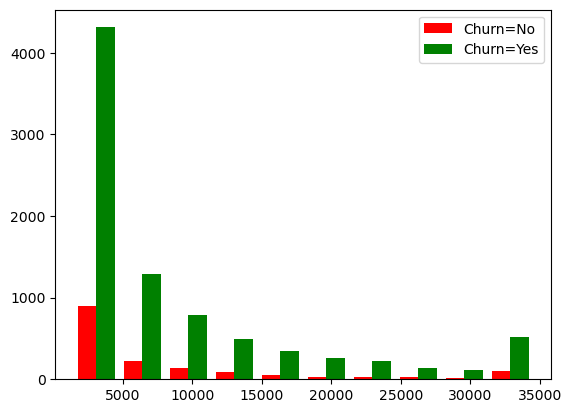

In [41]:
not_churn_credit_limit = df[df.Attrition_Flag==1].Credit_Limit
churn_credit_limit = df[df.Attrition_Flag==0].Credit_Limit
plt.hist([churn_credit_limit,not_churn_credit_limit],color=['red','green'], label=['Churn=No','Churn=Yes'])
plt.legend()

<div> The attrition customers has a lower transaction count, revolving balance, average utilization ration and transaction amount compared to  existing customers </div>

<div> Checking the distribution for the dataset</div>

<div><b> Creating pair plot from the dataset <b></div>

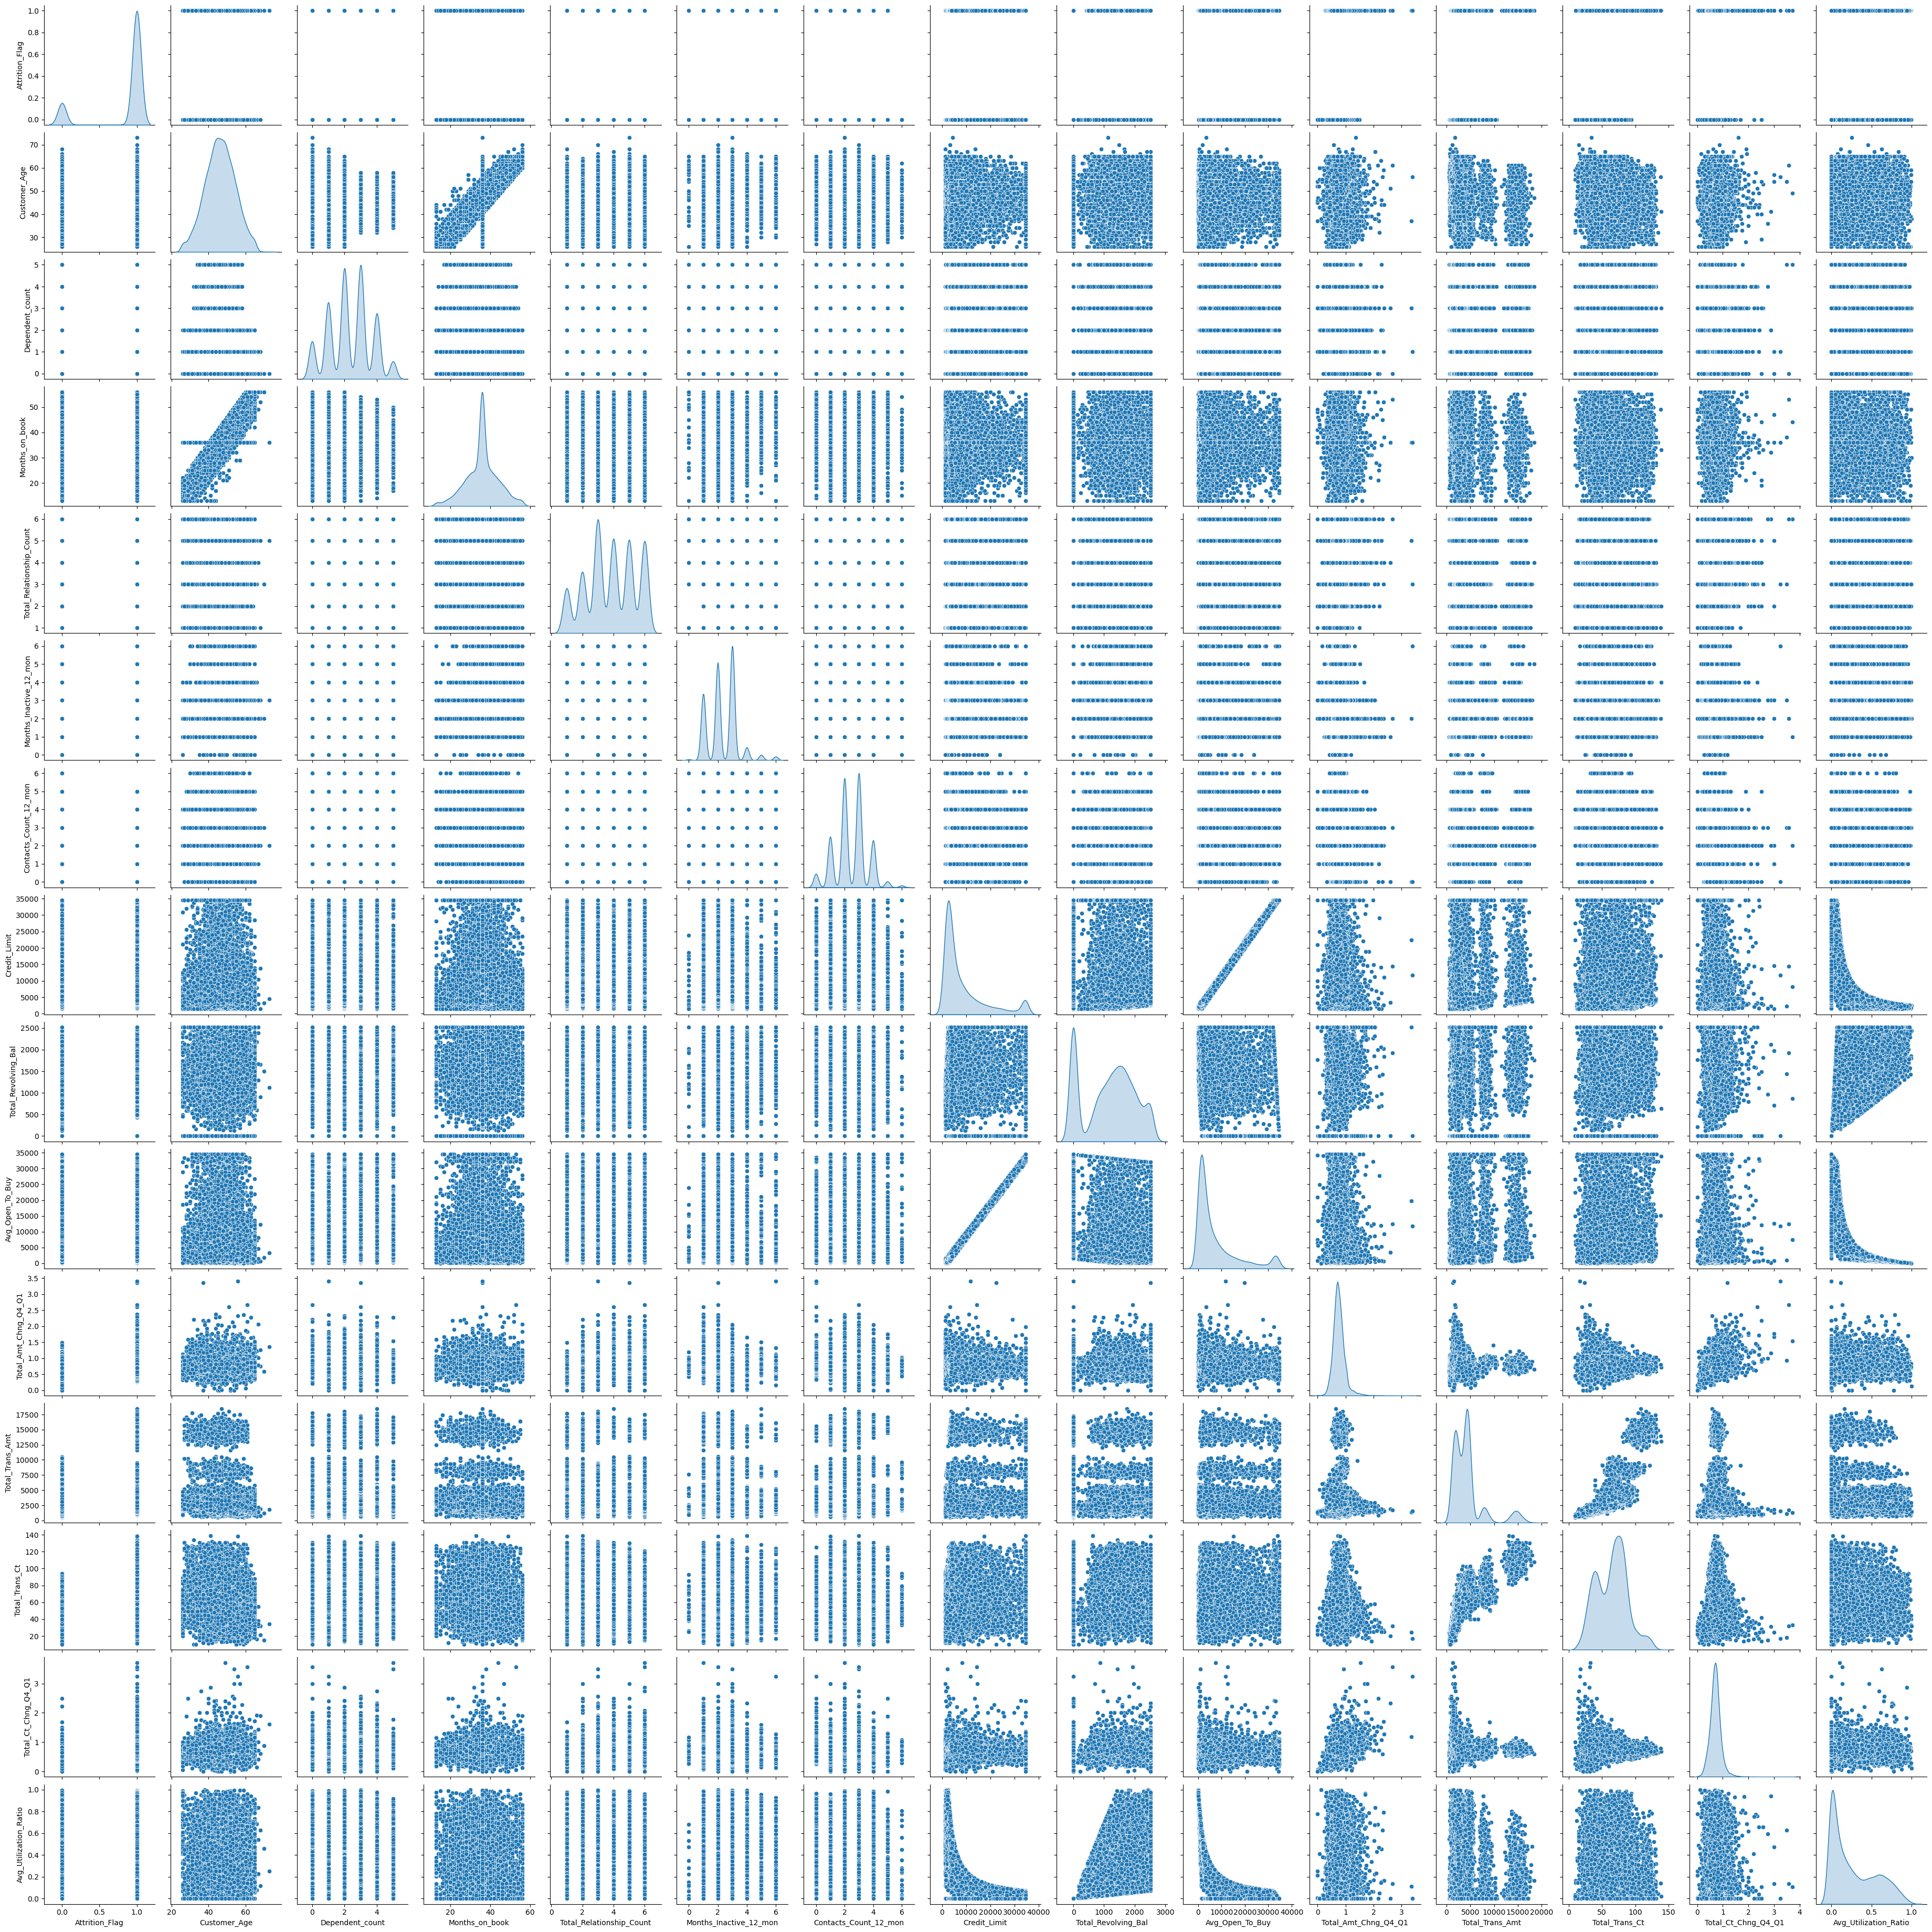

In [42]:
sns.pairplot(df, diag_kind='kde')

<div> </div>

<div> Applying encodings to the Categorical variable</div>

In [43]:
gender={'M':0,'F':1}
df['Gender'] = df['Gender'].map(gender)

# Second Step: Feature Importance or  Selection

<div>By Analysing the below correlation we can select what features can give more information and useful for the model predictions and also which features plays an important role. This will tell us which variables are more useful for to predict the chustomer churn. </div>

<div><b> Checking the corelation matrix</b></div>

(16.5, -0.5)

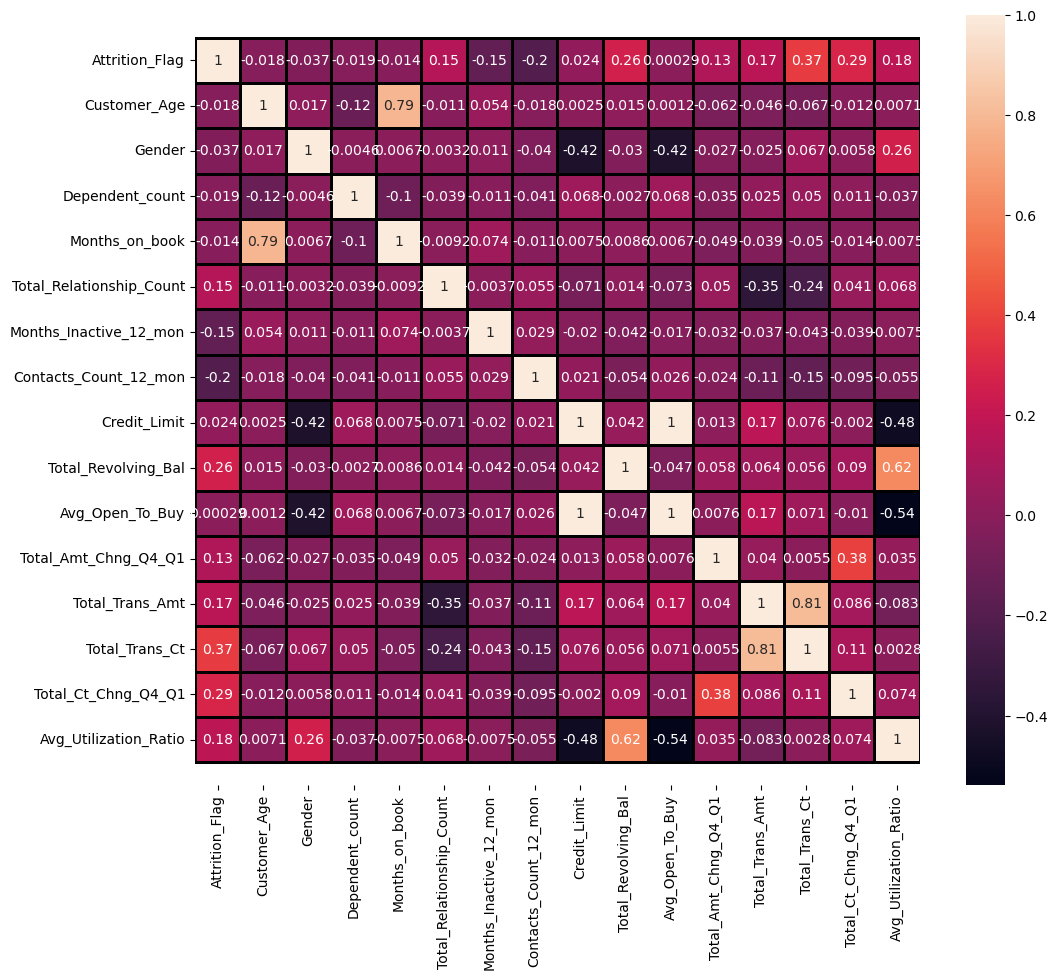

In [44]:
matrix = np.triu(df.corr())
f, ax = plt.subplots(figsize=(12, 10))

ax = sns.heatmap(df.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black') 

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<div> Findings from the correlation matrix</div>

1. Average_open_to_buy highly correlated with credit_limit
2. Average_Utilization_ration is correlated with total_revolving_balance
3. Total_trans_amt is higly correlated with Total_Trans_ct 
4. Total_Amt_Chang_Q4_Q1 is correlated to the Total_Ct_Chng_Q4_Q1

<div> Will not select these features for model building Average_open_to_buy, Average_Utilization_ration, Total_trans_amt</div>

 **Applying onehot encoding to the categorical features and creating a new dataframe**

In [45]:
cat_col = ['Income_Category','Education_Level','Marital_Status','Card_Category']
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df[cat_col])
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_col))
new_df = pd.concat([df.drop(cat_col, axis=1), encoded_cols_df], axis=1)

In [46]:
new_df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               1            45       0                3              39   
1               1            49       1                5              44   
2               1            51       0                3              36   
3               1            40       1                4              34   
4               1            40       0                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Income_Category_$120K +  \
0                  0.061                      0.0   
1                  0.105                      0.0   
2                  0.000                      0.0   
3                  0.760                      0.0   
4                  0.000                      0.0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          1.0   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                           0.0                             0.0   
1                           0.0                             1.0   
2                           1.0                             0.0   
3                           0.0                             1.0   
4                           0.0                             0.0   

   Income_Category_Unknown  Education_Level_College  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   Education_Level_Doctorate  Education_Level_Graduate  \
0                        0.0                       0.0   
1                        0.0                       1.0   
2                        0.0                       1.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                          1.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   
3                          1.0                            0.0   
4                          0.0                            0.0   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                

<div> Dropping the unknown columns and card silver category from the features </div>

In [47]:
new_df.drop(['Income_Category_Unknown','Education_Level_Unknown','Marital_Status_Unknown',
             'Card_Category_Silver'],axis=1,inplace=True)

<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

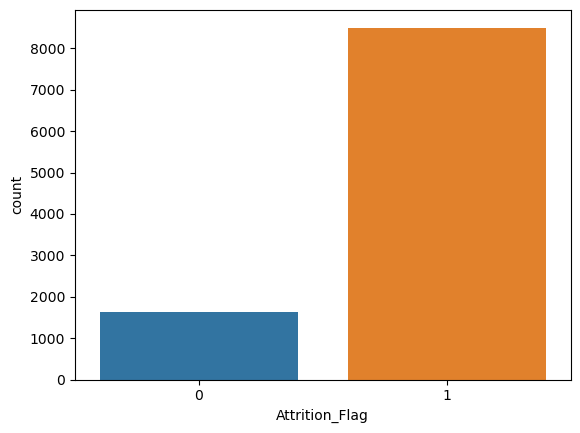

In [48]:
sns.countplot(x='Attrition_Flag', data=new_df)

<div> Here we can see that that the target cariable is highly imbalanced</div>

# Removing Colinear Features

<div> Before we build a machine learning model we need to remove highly colinear with one another. We don't want to use multiple collinear features in our model. We are using corelation matrix to remove those features</div>

<div> Dropping these features</div>
1. Avg_Open_To_Buy </br>
2. Avg_Utilization_Ratio </br>
3. Total_Trans_Amt 

In [49]:
new_df.drop(['Avg_Open_To_Buy','Avg_Utilization_Ratio','Total_Trans_Amt'],axis=1,inplace=True)

# Balancing the Dataset

<div> The target variable is highley imbalanced Using SMOTE to make it balanced dataset</div>
<div>
<b>SMOTE: Synthetic Monority Oversampling Technique: </b>SMOTE is an oversmapling technique where the synthetic sampleted are generated for the minority class. This helps to ovecome the overfitting problem by random oversampling the minority class. Before applying the SMOTE it is always best to split the data into train,test it avoid overfitting the data and for better performace of the model
</div>

In [50]:
x= new_df.drop(['Attrition_Flag'],axis=1)
y= new_df['Attrition_Flag']

#### Spliting the data into train and test sets

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 29)
(2026, 29)
(8101,)
(2026,)


<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

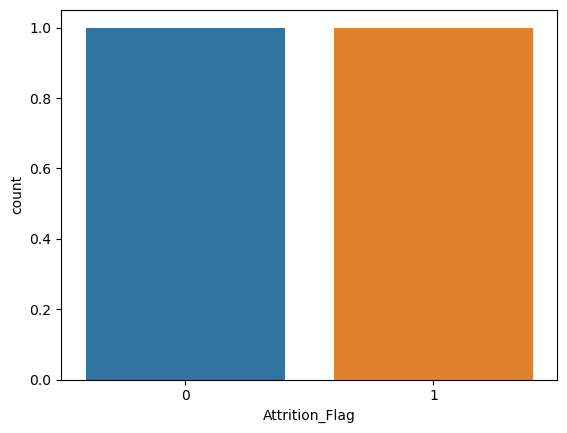

In [53]:
smote = SMOTE()
x_train_over_sample, y_train_over_sample = smote.fit_resample(x_train, y_train)
counter_before = Counter(y)
counter_after = Counter(y_train_over_sample)
df_after = pd.DataFrame(list(counter_after.items()), columns=["Attrition_Flag",'Count'])
sns.countplot(x='Attrition_Flag',data=df_after)

<div>After SMOTE the data samples</div>

In [54]:
print(x_train_over_sample.shape)
print(x_test.shape)
print(y_train_over_sample.shape)
print(y_test.shape)

(13602, 29)
(2026, 29)
(13602,)
(2026,)


### Shuffling the training data

<div><b> The sample method shuffles the rows in a dataframe</b><div>

In [55]:
resampled_data = pd.concat([x_train_over_sample, y_train_over_sample], axis=1)
shuffled_resampled_data = resampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
x_over_train_shuffled = shuffled_resampled_data.drop('Attrition_Flag', axis=1)
y_over_train_shuffled = shuffled_resampled_data['Attrition_Flag']

<div> Here the smote is added around 4000 samples to the target variable to balance the dataset</div>

#### Saving the data into csv files

In [60]:
x_over_train_shuffled.to_csv('x_train.csv',index=False)
y_over_train_shuffled.to_csv('y_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)